#  import kit

In [12]:
import pickle
import importlib
import numpy as np
import matplotlib.pyplot as plt
import Test_PEC_Readout_Sampler as pecro
import Test_PEC_TQG_Sampler as peccx
import Test_PEC_sampler as pec
import Test_Restore_Retrieve as RR
import Test_Bellstate_CHSH as chsh

import qiskit as q
from qiskit import QuantumCircuit
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

In [4]:
token = "PJubuPXreZKAxan0yV6OLEIkdKipFYGgvvkGQSZAtpMU"
instance = 'crn:v1:bluemix:public:quantum-computing:us-east:a/f071734952cb4c9993a642d0a87d18bb:392306ae-fe55-475c-a8c5-978d0ba1871e::'
name = "torino"
device_name = "ibm_" + name
QiskitRuntimeService.save_account(
        channel="ibm_quantum_platform",
        token=token,
        instance=instance,
        set_as_default=True,
        overwrite=True
    )
service = QiskitRuntimeService()
device = service.backend(device_name)
noise_model = NoiseModel.from_backend(device)

In [ ]:
backend = AerSimulator.from_backend(device)
backend_options = {
    # "method": "automatic",
    "noise_model": noise_model,
    "basis_gates": noise_model.basis_gates,
    "coupling_map": device.configuration().coupling_map,
    # parallelism knobs
    # "max_parallel_experiments": None,
    # "max_parallel_threads": None
    # "device": "GPU",  # if you have qiskit-aer-gpu
}
run_options = {
    "shots": 1024,
    # "seed_simulator": 12345,
}

sampler = SamplerV2(
    options={
        "backend_options": backend_options,
        "run_options": run_options,
        # "default_precision": 0.0,  # if you want deterministic path where applicable
    }
)
sampler.mode=backend
backendqubitNum = backend.num_qubits
print(backendqubitNum)

133


In [36]:
max_parallel_experiments=backend_options["max_parallel_experiments"] if backend_options["max_parallel_experiments"] is None else 32
max_parallel_experiments

# Build Circuit

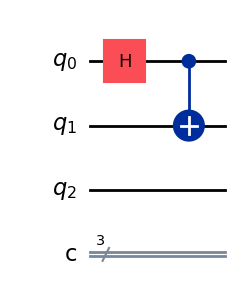

In [57]:
Bell_circuit = QuantumCircuit(3, 3)
Bell_circuit.h(0)
Bell_circuit.cx(0, 1)
# Bell_circuit.cx(1, 2)
Bell_circuit.draw('mpl')

# Calculate Readout PEC Observable

In [46]:
importlib.reload(pecro)

<module 'Test_PEC_Readout_Sampler' from '/home/xiaonan/PEC/Development/Test_PEC_Readout_Sampler.py'>

In [58]:
pec_readout_info = pecro.readout_pec_sampler_subsystem(Bell_circuit, sampler, backend, shots=1024, backend_options=backend_options)

Batch mode: single process, batch circuits per measurement.
II: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
IX: [0.03125, 0.060546875, 0.90625, -0.009765625, 0.01953125, 0.06640625, 0.908203125, -0.0078125, 0.025390625, -0.025390625, 0.916015625, 0.015625, 0.009765625, -0.037109375, 0.890625]
IY: [0.029296875, -0.021484375, -0.03515625, 0.916015625, 0.001953125, 0.072265625, -0.01171875, 0.8984375, 0.046875, 0.015625, 0.044921875, 0.90625, -0.005859375, 0.017578125, 0.01953125]
IZ: [0.919921875, -0.912109375, 0.029296875, 0.0, 0.900390625, -0.8984375, 0.017578125, 0.04296875, 0.90234375, -0.90625, 0.0625, 0.0625, 0.896484375, -0.904296875, 0.021484375]
XI: [0.01953125, -0.048828125, -0.01171875, 0.01171875, -0.08203125, 0.0234375, 0.01953125, 0.0390625, 0.74609375, 0.744140625, 0.73828125, 0.73828125, -0.03515625, -0.03125, -0.037109375]
XX: [0.017578125, 0.021484375, -0.01953125, 0.00390625, 0.009765625, 0.01171875, 0.00390625, -0.00390625, -0.01953125,

In [61]:
RR.save_readout_result(pec_readout_info, fname="Oweights", parent_dir="ROWeight")
# load_readout_result = RR.load_readout_result("ROWeight/20251117-171905/Oweights.pkl")

Saved to: ROWeight/20251121-142715/Oweights.pkl


PosixPath('ROWeight/20251121-142715/Oweights.pkl')

In [59]:
B = pec_readout_info["B"]
readout_weights = pec_readout_info["ReadoutWeight"]
print("B:", B, "\nReadoutWeight:", readout_weights)

B: [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.44335938e-02  8.62792969e-01 -5.32226562e-02 -1.90429688e-02
  -4.44335938e-02  5.32226562e-02  6.88476562e-02  4.44335938e-02
  -5.81054688e-02  4.15039062e-02  4.15039062e-02  4.24804688e-02
   1.46484375e-03 -2.44140625e-03 -2.44140625e-03  4.39453125e-03]
 [ 2.05078125e-02 -4.39453125e-02  8.86718750e-01 -4.88281250e-03
   1.07421875e-02  5.76171875e-02 -1.17187500e-02  2.05078125e-02
  -1.46484375e-02  5.76171875e-02 -3.90625000e-03 -6.83593750e-03
  -1.66015625e-02  4.88281250e-03  2.53906250e-02  3.02734375e-02]
 [ 2.44140625e-03  2.09960938e-02  1.90429688e-02  9.07714844e-01
  -4.39453125e-03  4.34570312e-02  4.54101562e-02 -3.41796875e-03
  -6.34765625e-03  4.39453125e-03 -1.12304688e-02 -7.32421875e-03
   1

# Calculate CNOT PEC Weight

In [60]:
importlib.reload(peccx)

<module 'Test_PEC_TQG_Sampler' from '/home/xiaonan/PEC/Development/Test_PEC_TQG_Sampler.py'>

In [62]:
pack = peccx.compute_tqg_matrices(sampler, Bell_circuit, shots=4096)

num_qubits: 3
(c0,t1) 1/16 (active=[0, 1])
(c0,t1) 2/16 (active=[0, 1])
(c0,t1) 3/16 (active=[0, 1])
(c0,t1) 4/16 (active=[0, 1])
(c0,t1) 5/16 (active=[0, 1])
(c0,t1) 6/16 (active=[0, 1])
(c0,t1) 7/16 (active=[0, 1])
(c0,t1) 8/16 (active=[0, 1])
(c0,t1) 9/16 (active=[0, 1])
(c0,t1) 10/16 (active=[0, 1])
(c0,t1) 11/16 (active=[0, 1])
(c0,t1) 12/16 (active=[0, 1])
(c0,t1) 13/16 (active=[0, 1])
(c0,t1) 14/16 (active=[0, 1])
(c0,t1) 15/16 (active=[0, 1])
(c0,t1) 16/16 (active=[0, 1])


In [63]:
pec_tqg_info = peccx.averaged_pauli_twirling_matrix(pack, B=pec_readout_info["B"])
tqg_weights = peccx.compute_inv_weights_for_package(pec_tqg_info)
tqg_weights

{(0,
  1): array([ 0.76280525,  0.24866168,  0.02838877, -0.00081284, -0.01234592,
         0.00786075,  0.24619752, -0.25516242, -0.00404693, -0.00789898,
        -0.23506669,  0.24784824,  0.2259203 , -0.24124018, -0.01814813,
         0.00703958])}

In [64]:
RR.save_vectors(tqg_weights, fname="Gweights", parent_dir="TQGWeight")

{'dir': 'TQGWeight/20251121-142925',
 'npy': 'TQGWeight/20251121-142925/Gweights.npy',
 'npz': 'TQGWeight/20251121-142925/Gweights.npz',
 'csv_list': ['TQGWeight/20251121-142925/Gweights_c0_t1.csv'],
 'meta_json': 'TQGWeight/20251121-142925/Gweights_meta.json',
 'mat': 'TQGWeight/20251121-142925/Gweights.mat'}

In [ ]:
# loadweights = RR.load_vectors("TQGWeight/20250908-135302/weight.npy")
# loadweights

In [68]:
importlib.reload(pec)
importlib.reload(chsh)
importlib.reload(RR)

<module 'Test_Restore_Retrieve' from '/home/xiaonan/PEC/Development/Test_Restore_Retrieve.py'>

In [73]:
# 2) 你的 readout 與 TQG 權重
# readout_weight: {'XX': w_vec(16), 'ZX': ..., 'XZ': ..., 'ZZ': ...}
# weights_map_tqg: {(c,t): np.ndarray length 4^n}  (n=電路總 qubits；或 m=active 也行，只要一致)
n_trials=10
S_pec, S_nopec, summary, details_pec, details_nopec, meas_pec, meas_nopec = chsh.compare_pec_vs_nopec_sampler(
    sampler=sampler,
    qcircuit=Bell_circuit,
    tqg_weights=tqg_weights,
    readout_weights=readout_weights,
    n_trials=n_trials,
    backend=backend,
    opt_level=0,
    shots=1024,
    combo_batch_size=256,
    max_batch=1024
)

print("=== Summary over trials ===")
print(summary)

[ 1.          0.0234375   0.04101562  0.00390625  0.01171875  0.66601562
 -0.07421875  0.04882812 -0.04296875 -0.07226562 -0.65039062  0.0078125
  0.01757812 -0.02148438 -0.06054688  0.6875    ]
16/16 (100.0%)
{'measII': {'obs': 'measII', 'value': 1.0000000000000004}, 'measXI': {'obs': 'measXI', 'value': 0.020534529248735178}, 'measYI': {'obs': 'measYI', 'value': 0.014073071486834215}, 'measZI': {'obs': 'measZI', 'value': -0.022793354073349214}, 'measIX': {'obs': 'measIX', 'value': -0.019948918018988328}, 'measXX': {'obs': 'measXX', 'value': 0.6581011160912117}, 'measYX': {'obs': 'measYX', 'value': 0.0030464074642556896}, 'measZX': {'obs': 'measZX', 'value': -0.023522684732486428}, 'measIY': {'obs': 'measIY', 'value': 0.021460888997590386}, 'measXY': {'obs': 'measXY', 'value': -0.020491676493794235}, 'measYY': {'obs': 'measYY', 'value': -0.6849997066348126}, 'measZY': {'obs': 'measZY', 'value': -0.04900672324300173}, 'measIZ': {'obs': 'measIZ', 'value': -0.009697529482924063}, 'measXZ'

In [74]:
experiment_results={
    "S_pec": S_pec,
    "S_nopec": S_nopec,
    "summary": summary,
    "details_pec": details_pec,
    "details_nopec": details_nopec,
    "meas_pec": meas_pec,
}
RR.save_experiment_results(experiment_results, fname = "bellstate", parent_dir = "BellState_results")
# with open("BellState_results/20251118-114007/bellstate.pkl", "rb") as f: data = pickle.load(f)
print(experiment_results)

Saved to: BellState_results/20251121-155028/bellstate.pkl
{'S_pec': array([2.75587626, 2.81952777, 2.80297731, 2.68202617, 2.87436128,
       2.55481076, 2.7089152 , 2.72094286, 2.73236427, 2.64746719]), 'S_nopec': array([1.91416015, 1.96111646, 1.87825239, 1.82577181, 1.83682035,
       1.86167957, 1.78433977, 1.84234462, 1.8948252 , 1.80091258]), 'summary': {'PEC_mean': 2.7299269074255674, 'PEC_std': 0.09140096669959562, 'noPEC_mean': 1.860022290824301, 'noPEC_std': 0.05368942908997023}, 'details_pec': [{'E00': 0.6312660723700608, 'E01': 0.7639225376947352, 'E10': 0.6441625624538178, 'E11': -0.7165250869236581, 'S': 2.755876259442272}, {'E00': 0.677749729483851, 'E01': 0.7417450966407785, 'E10': 0.7044614333635965, 'E11': -0.6955715115258141, 'S': 2.81952777101404}, {'E00': 0.7030779088373, 'E01': 0.7650069725523354, 'E10': 0.6243386144665982, 'E11': -0.7105538187353935, 'S': 2.802977314591627}, {'E00': 0.6959031794591223, 'E01': 0.686016112910409, 'E10': 0.6323760472405142, 'E11': -

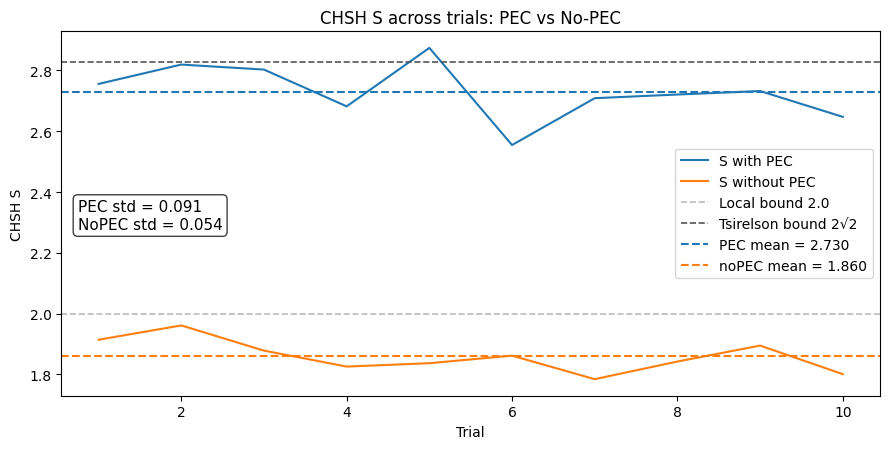

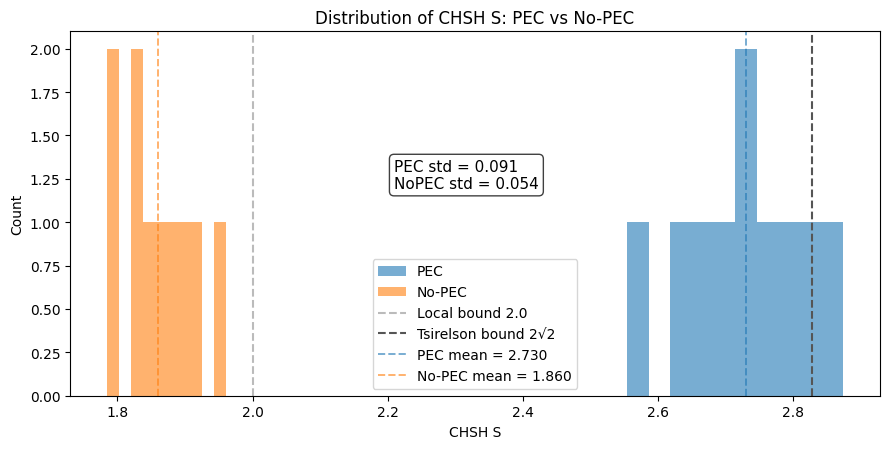

[SAVE] CHSH_trial → output_graph/20251121-155029_10/CHSH_trial.png
[SAVE] CHSH_distribution → output_graph/20251121-155029_10/CHSH_distribution.png


In [75]:
# ======  畫圖：折線 + 兩條平均線；以及分布（直方圖） ======
dark_gray = "#555555"  
light_gray = "#bbbbbb"
# 折線圖（每次 trial 的 S 值）
plt.figure(figsize=(9,4.6))
fig_trial = plt.gcf() 
line_pec, = plt.plot(range(1, n_trials+1), S_pec, label="S with PEC")
line_nopec, = plt.plot(range(1, n_trials+1), S_nopec, label="S without PEC")
plt.axhline(2.0, linestyle="--", linewidth=1.2, color=light_gray, label="Local bound 2.0")
plt.axhline(2*np.sqrt(2), linestyle="--", linewidth=1.2, color=dark_gray, label="Tsirelson bound 2√2")
plt.axhline(summary["PEC_mean"], linestyle="--", color=line_pec.get_color(), label=f"PEC mean = {summary['PEC_mean']:.3f}")
plt.axhline(summary["noPEC_mean"], linestyle="--", color=line_nopec.get_color(), label=f"noPEC mean = {summary['noPEC_mean']:.3f}")
plt.xlabel("Trial")
plt.ylabel("CHSH S")
plt.title("CHSH S across trials: PEC vs No-PEC")
textstr = (
    f"PEC std = {summary['PEC_std']:.3f}\n"
    f"NoPEC std = {summary['noPEC_std']:.3f}"
)
plt.gca().text(
    0.02, 0.45, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.75)
)
plt.legend()
plt.tight_layout()
plt.show()

# 直方圖（分布比較）
plt.figure(figsize=(9,4.6))
fig_dist = plt.gcf() 
n_pec, bins_pec, patches_pec = plt.hist(S_pec, bins=max(10, n_trials//5), alpha=0.6, label="PEC")
n_nopec, bins_nopec, patches_nopec = plt.hist(S_nopec, bins=max(10, n_trials//5), alpha=0.6, label="No-PEC")
plt.axvline(2.0, linestyle="--", color=light_gray, label="Local bound 2.0")
plt.axvline(2*np.sqrt(2), linestyle="--", color=dark_gray, label="Tsirelson bound 2√2")
plt.axvline(summary["PEC_mean"], linestyle="--", color=patches_pec[0].get_facecolor(), linewidth=1.4, label=f"PEC mean = {summary['PEC_mean']:.3f}")
plt.axvline(summary["noPEC_mean"], linestyle="--", color=patches_nopec[0].get_facecolor(), linewidth=1.4, label=f"No-PEC mean = {summary['noPEC_mean']:.3f}")
plt.xlabel("CHSH S")
plt.ylabel("Count")
plt.title("Distribution of CHSH S: PEC vs No-PEC")
textstr = (
    f"PEC std = {summary['PEC_std']:.3f}\n"
    f"NoPEC std = {summary['noPEC_std']:.3f}"
)
plt.gca().text(
    0.4, 0.65, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.75)
)
plt.legend()
plt.tight_layout()
plt.show()
save_dir = RR.save_chsh_figures(fig_trial, fig_dist, n_trials, parent_dir="output_graph")